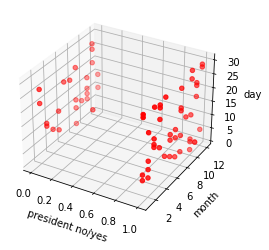

<ipython-input-45-1d1bacb7914c>:69: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



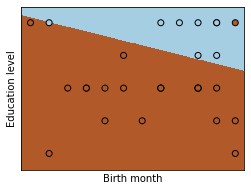

Train error: 3.45393


<ipython-input-45-1d1bacb7914c>:87: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



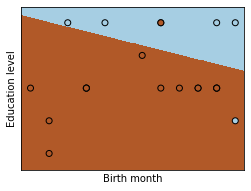

Validation error: 6.57893


<ipython-input-45-1d1bacb7914c>:124: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



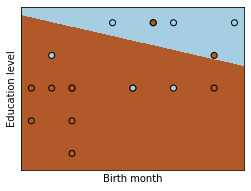

Test set error: 11.51310
Test set error in 0/1: 0.33333


In [45]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.metrics import log_loss
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.utils import shuffle
from sklearn.metrics import zero_one_loss



path = "data.csv"  # Define file path
data = np.loadtxt(path, delimiter=',', skiprows=1)  # Load data as an ndarray
data = shuffle(data, random_state=0)

day=data[:,1]; 
month=data[:,2]; 
education=data[:,3]; 
label=data[:,4];



#for 1 feature
#plt.figure()  # Set size of figure
#plt.scatter(month, label)  # Make a scatterplot of the weights vs. waists.xlabel('day')  # Set label to x-axis
#plt.ylabel('president yes/no')  # Set label to y-axis
#plt.show()

#for 2 features
fig = plt.figure()  # Set size of figure
ax = fig.add_subplot(111, projection='3d')
ax.scatter(label, month, day, c='r', marker='o')  # Make a scatterplot of the weights vs. waists
ax.set_xlabel('president no/yes')  # Set label to x-axis
ax.set_ylabel('month')  # Set label to y-axis
ax.set_zlabel('day')
plt.show()

s = 51;
X=data[:s,[2, 3]]
label=data[:s,4];


Xt=data[s:,[2, 3]]
yt=data[s:,4];

X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.4, random_state=0)


###

logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Birth month')
plt.ylabel('Education level')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

print("Train error: {:.5f}".format(log_loss(y_train, logreg.predict(X_train))))
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Birth month')
plt.ylabel('Education level')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
print("Validation error: {:.5f}".format(log_loss(y_test, logreg.predict(X_test))))

##Plot error
f = ["Train error", "Validation error"]
fig = px.line(x=f, y=[0,0], color=px.Constant("This year"),labels=dict(x="", y="Error", color="Time Period"))
fig.add_bar(x=f, y=[log_loss(y_train, logreg.predict(X_train)),log_loss(y_test, logreg.predict(X_test))], name="Last year")
fig.show()


#TEST SET
##TEST
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].


x_min, x_max = Xt[:, 0].min() - .5, Xt[:, 0].max() + .5
y_min, y_max = Xt[:, 1].min() - .5, Xt[:, 1].max() + .5
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


plt.scatter(Xt[:, 0], Xt[:, 1], c=yt, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Birth month')
plt.ylabel('Education level')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
print("Test set error: {:.5f}".format(log_loss(yt, logreg.predict(Xt))))
print("Test set error in 0/1: {:.5f}".format(zero_one_loss(yt, logreg.predict(Xt))))
